# ECS@UW Python Tutorial
- [How to install/run python and jupyter notebook](#Intalling/running-Python-and-Jupyter)

#### [Python basics](#Python-Basics)
- Basic Datatypes
- Variables
- Operations
- For, if/else statements

#### [Using python for scientific computing](#Using-python-libraries-for-science)
- Importing libraries
- Finding documentation

#### [Example: Load, plot, and analyze data](#An-example:-load,-plot,-and-analyze-data)

## Intalling/running Python and Jupyter

## Python Basics

### Datatypes

In [40]:
# Assign variables; Integer, Float types; mathematical operations; print function
x_int=4
x_float=4.
y=3

print " y/x_float = ", y/x_float, "; y/x_int = ", y/x_int
print "x_float/y = ", x_float/y, "; x_int/y = ", x_int/y

 y/x_float =  0.75 ; y/x_int =  0
x_float/y =  1.33333333333 ; x_int/y =  1


In [38]:
# Arrays and Range function
# Note how the range function starts counting at zero!
array_test = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
array_test_two=range(0,10)

print array_test , array_test_two
# Note that you can address a single entry in an array!
print array_test[4]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
4


In [46]:
# Dictionary is like an Array but with nameable entries
dict_test = dict(one=1, two=2, three=3)
dict_test_two = {'one': 1, 'two': 2, 'three': 3}
print dict_test, dict_test_two
print dict_test['two']

{'three': 3, 'two': 2, 'one': 1} {'three': 3, 'two': 2, 'one': 1}
2


### For, if/else statements

In [37]:
# Booleans - note capitalization is important!
# Also, note it is possible to use other possibilities in place of a boolean (0 vs 1, or exists vs not)
test_boolean = True
if test_boolean:
    print "Wow, the boolean is set to true!"
else:
    print "The boolean evaluated as false!"
    
# For loop!
# Note that counting starts at 0, as above
comparison_value = 3
for index in range(0,7):
    if index > comparison_value:
        print index, " is greater than ", comparison_value
    else:
        print index, " is less than or equal to ", comparison_value
        
for value in array_test:
    print value

Wow, the boolean is set to true!
0  is less than or equal to  3
1  is less than or equal to  3
2  is less than or equal to  3
3  is less than or equal to  3
4  is greater than  3
5  is greater than  3
6  is greater than  3
0
1
2
3
4
5
6
7
8
9
3
3


## Using functions

In [47]:
# Function demonstration using 'count' and 'append' array functions
# Each type has built-in functions, some are same between types others are not
print array_test.count(3)
array_test.append(3)
print array_test
array_test.count(3)

1
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 3]


2

## Using python libraries for science

In [48]:
# Library modules in Python expand functionality
import numpy
print numpy
# Modules have functions just like the built-in types!
numpy.math.degrees(3.141592)

<module 'numpy' from 'C:\Users\shead\Anaconda2\lib\site-packages\numpy\__init__.py'>


179.99996255206332

## An example: load, plot, and analyze data

### Read in .csv file containing data from potentiostat

| Time (s) | Voltage (V) | Current (I) | 
|:---:|:----:|-----|
|  0  | -0.28 | -0.11 |
| $\vdots$| $\vdots$ | $\vdots$ |
|9.99 | -0.28 | -0.11 |


In [14]:
# import the pandas package
import pandas as pd

# read in the data from our file
data = pd.read_csv('./time-data(833).txt')

# assign names to each of the columns for easy reference
data.columns = ['time(s)', 'current(A)', 'potential(V)', 'frequency(Hz)', 'amplitude(A)']

# print out the first 5 rows of our data
data.head()

,time(s),current(A),potential(V),frequency(Hz),amplitude(A)
0,0.000000,-0.284471,-0.105758,1.0,0.3
1,0.002441,-0.284077,-0.105703,NaN,NaN
2,0.004883,-0.283850,-0.105895,NaN,NaN
3,0.007324,-0.283256,-0.105730,NaN,NaN
4,0.009766,-0.282669,-0.105804,NaN,NaN


### Quickly plot the current and voltage

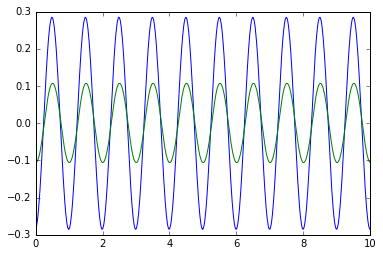

In [16]:
# import the matplotlib package
import matplotlib.pyplot as plt

# magic function to place the output figures directly in the notebook
%matplotlib inline 

# plot the current and voltage vs time
plt.plot(data['time(s)'], data['current(A)'])
plt.plot(data['time(s)'], data['potential(V)'])

plt.show()

#### Add legend, title, axis labels, etc.

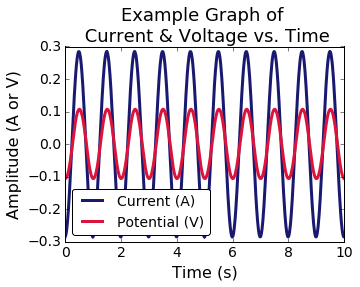

In [103]:
# initialize a figure (this helps with sizing of the plot as well as saving the result)
fig = plt.figure(1, figsize=(5,3.5))

# plot as before, but with optional formatting kwargs
plt.plot(data['time(s)'], data['current(A)'], linewidth=3, color='midnightblue', label = 'Current (A)')
plt.plot(data['time(s)'], data['potential(V)'], linewidth=3, color='crimson', label = 'Potential (V)')

# add axes labels
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Amplitude (A or V)', fontsize=16)

# change size of axes numbers
plt.tick_params(axis='both', which='major', labelsize=14)

# add legend
plt.legend(loc='lower left', fontsize=14, fancybox=True)

# add title
plt.title('Example Graph of \n Current & Voltage vs. Time', fontsize=18)

plt.show()

# save figure
fig.savefig('./example-figure.png', bbox_inches='tight', )

### Fourier transform the data

In [84]:
import numpy as np

frequency = data['frequency(Hz)'].loc[0]

time = data['time(s)'].tolist()
i = (data['current(A)']*1000.0).tolist()
v = (data['potential(V)']*1000.0).tolist()

cyc = (time[-1] + time[1])*frequency
index = int(round(cyc))
N = len(v)

i_hat = np.fft.fft(i)/(N/2) # Normalize FFT results
v_hat = np.fft.fft(v)/(N/2) # using N/2 (results in mA/mV)

M = (np.concatenate([np.arange(0,N/2),np.arange(-N/2,0)])/(cyc)).tolist()

### Plot the frequency domain voltage

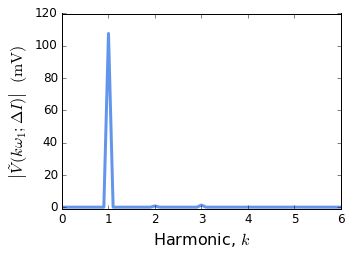

In [99]:
fig = plt.figure(1, figsize=(5, 3.5))
ax = fig.add_subplot(111)

plt.plot(M[0:6*index+1],np.abs(v_hat[0:6*index+1]),'-', linewidth=3, color='cornflowerblue')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlim(0,6)
plt.ylim(-1,120)
plt.xlabel('Harmonic, $k$', fontsize=16)
plt.ylabel(r'$\left|\tilde V \left(k\omega_1; \Delta I\right)\right| \ \ \mathrm{(mV)}$', fontsize=16)

plt.show()

### ... and add inset for harmonics

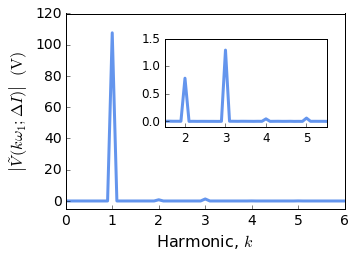

In [98]:
fig = plt.figure(1, figsize=(5, 3.5))
ax = fig.add_subplot(111)

plt.plot(M[0:6*index+1],np.abs(v_hat[0:6*index+1]),'-', linewidth=3, color='cornflowerblue')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlim(0,6)
plt.ylim(-5,120)
plt.xlabel('Harmonic, $k$', fontsize=16)
plt.ylabel(r'$\left|\tilde V \left(k\omega_1; \Delta I\right)\right| \ \ \mathrm{(V)}$', fontsize=16)

ax2 = fig.add_axes([.4,.45,.45,.35])
plt.plot(M[index+1:6*index+1],np.abs(v_hat[index+1:6*index+1]),'-', linewidth=3, color='cornflowerblue')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlim(1.5,5.5)
plt.ylim(-.1, 1.5)
y_ticks = np.linspace(0, 1.5, num=4, endpoint=True)
ax2.set_yticks(y_ticks)
x_ticks = np.linspace(2, 5, num=4, endpoint=True)
ax2.set_xticks(x_ticks)

for axes in [ax, ax2]:
    axes.tick_params(right="off")
    axes.tick_params(top="off")

plt.show()